In [1]:
#


In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,mean_squared_log_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


In [11]:
data=pd.read_csv('winequality-white.csv', sep=';')
print(data.head())

data.info()

pd.DataFrame({'Count':data.isnull().sum(),'Percentage':data.isnull().sum()/data.shape[0]})


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

,Count,Percentage
fixed acidity,0,0.0
volatile acidity,0,0.0
citric acid,0,0.0
residual sugar,0,0.0
chlorides,0,0.0
free sulfur dioxide,0,0.0
total sulfur dioxide,0,0.0
density,0,0.0
pH,0,0.0
sulphates,0,0.0


In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error

# Load dataset
data = pd.read_csv('winequality-white.csv', sep=';')

# Check for missing values
data.dropna(inplace=True)

# Define dependent (y) and independent (X) variables
X = data.drop(columns=['alcohol'])
y = data['alcohol']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'SVM': SVR(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor()
}

# DataFrame to store results
results = pd.DataFrame(columns=['Model', 'RMSE', 'MAPE', 'RMSLE'])

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = mean_absolute_percentage_error(y_test, y_pred)
    rmsle = np.sqrt(mean_squared_log_error(y_test, np.maximum(0, y_pred)))  # Avoid negative predictions for RMSLE
    
    # Prepare a dictionary for the current model results
    model_results = {'Model': name, 'RMSE': rmse, 'MAPE': mape, 'RMSLE': rmsle}

    # Use pd.concat to add results to the DataFrame
    results = pd.concat([results, pd.DataFrame([model_results])], ignore_index=True)


# Display the results
print(results)


               Model      RMSE      MAPE     RMSLE
0  Linear Regression  0.384668  2.838162  0.033498
1                SVM  1.017035  7.410665  0.085891
2   Ridge Regression  0.895389  6.731005  0.077448
3   Lasso Regression  1.082089  8.204040  0.092155
4      Decision Tree  0.485016  2.778991  0.042080


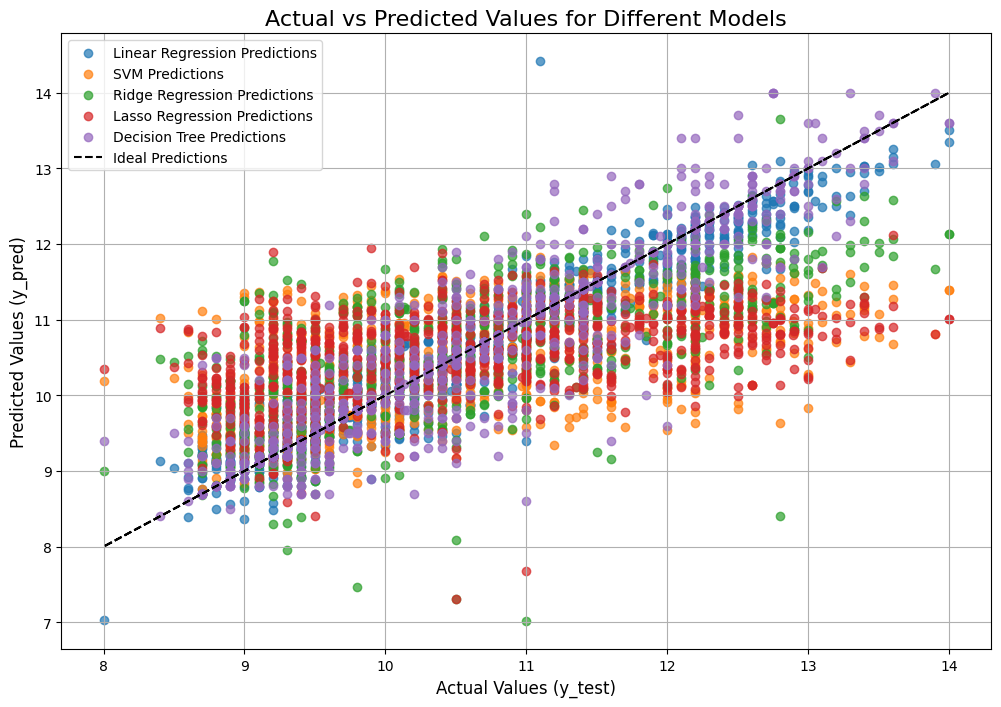

In [16]:
import matplotlib.pyplot as plt

# Initialize the plot
plt.figure(figsize=(12, 8))

# Plot actual vs predicted for each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Scatter plot for the model's predictions
    plt.scatter(y_test, y_pred, label=f"{name} Predictions", alpha=0.7)

# Plot the line y = x for reference
plt.plot(y_test, y_test, color='black', linestyle='--', label="Ideal Predictions")

# Configure plot aesthetics
plt.title("Actual vs Predicted Values for Different Models", fontsize=16)
plt.xlabel("Actual Values (y_test)", fontsize=12)
plt.ylabel("Predicted Values (y_pred)", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


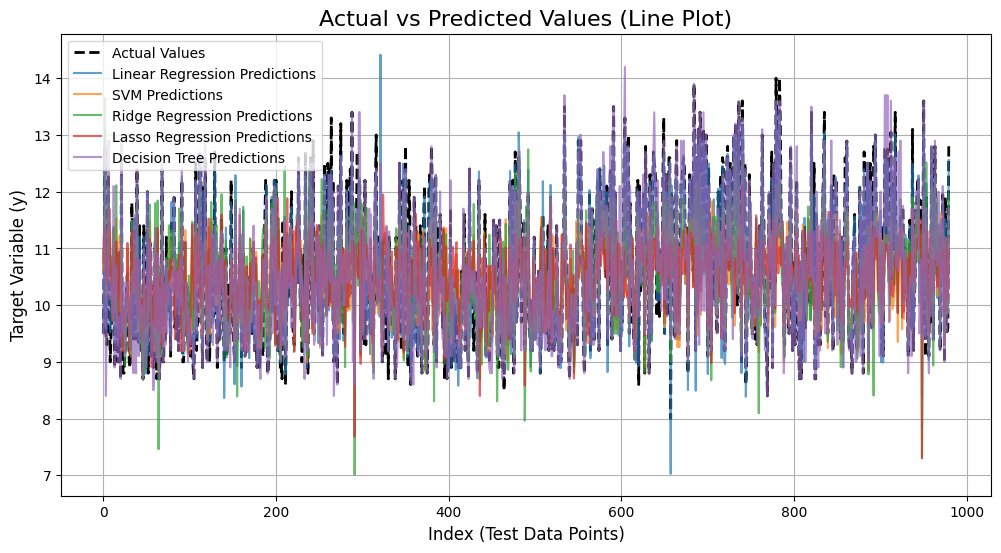

In [18]:
# Initialize the plot
plt.figure(figsize=(12, 6))

# Sort the test values and their corresponding predictions for a smoother plot
y_test_sorted = y_test.sort_index()  # Ensure the order corresponds to X_test
x_axis = range(len(y_test_sorted))   # Create a sequential x-axis

# Plot actual test values
plt.plot(x_axis, y_test_sorted, label="Actual Values", color="black", linestyle="--", linewidth=2)

# Add predictions for each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_sorted = pd.Series(y_pred, index=y_test.index).sort_index()  # Align with y_test
    plt.plot(x_axis, y_pred_sorted, label=f"{name} Predictions", alpha=0.7)

# Configure plot aesthetics
plt.title("Actual vs Predicted Values (Line Plot)", fontsize=16)
plt.xlabel("Index (Test Data Points)", fontsize=12)
plt.ylabel("Target Variable (y)", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()
